# Exploratory Data Analysis
This dataset was scraped from Airbnb using Octoparse through a 2-step method, treated, merged and processed. You can check this all in the `preprocessing.ipynb` notebook in the repository. 

Our objective is to use it to analyse and understand the Airbnb market in Campos do Jordão, a touristic town in the state of São Paulo, Brazil.

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [9]:
# Loading the dataset
df_loaded = pd.read_csv('datasets/final_dataset.csv')

df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   roomType                           643 non-null    object 
 1   roomPrice                          643 non-null    float64
 2   roomURL                            643 non-null    object 
 3   hostType                           643 non-null    object 
 4   rating                             643 non-null    float64
 5   countReviews                       643 non-null    float64
 6   Air Conditioning                   643 non-null    int64  
 7   TV                                 643 non-null    int64  
 8   Dryer                              643 non-null    int64  
 9   Bathroom                           643 non-null    int64  
 10  Ethernet connection                643 non-null    int64  
 11  Kitchen                            643 non-null    int64  

In [18]:
# Making a few adjustments
# Dropping some columns
columns_to_drop = ['Unavailable: Lock on bedroom door', 'Lock on bedroom door', 'Bedroom 2']
df = df_loaded.drop(columns=columns_to_drop)

# Renaming a column to avoid ambiguities
df = df.rename(columns={
                'Dryer': 'Hair Dryer',
                'hostType': 'qualityBadge'})

pd.option_context('mode.use_inf_as_na', True)

# Display the first few rows of the cleaned dataset to confirm changes
df.head()

,roomType,roomPrice,roomURL,qualityBadge,rating,countReviews,Air Conditioning,TV,Hair Dryer,Bathroom,...,Refrigerator,Smoking allowed,Patio,High Chair,Sauna,Crib,Washer,Accessible,Breakfast,is_new
0,Loft,268.0,https://www.airbnb.com/rooms/92836566916150808...,preferido,4.89,74.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Loft,99.0,https://www.airbnb.com/rooms/53832612?adults=2...,preferido,4.95,148.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Chalé,329.0,https://www.airbnb.com/rooms/22588205?adults=2...,preferido,4.94,319.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chalé,595.0,https://www.airbnb.com/rooms/11096252207560438...,superhost,5.00,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Quarto,276.0,https://www.airbnb.com/rooms/22084606?adults=2...,preferido,4.93,507.0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0


## Descriptive Analysis
First I separate numerical columns from qualitative or categorical columns, and fix the dtype.


In [19]:
## Descriptive Analysis
num_df = df[['roomPrice', 'rating', 'countReviews']]
cat_df = df[['roomType', 'qualityBadge', 'is_new']].astype('category')

In [20]:
# Numerical columns Analysis
num_descriptive = num_df.describe()

num_descriptive

,roomPrice,rating,countReviews
count,643.000000,643.000000,643.000000
mean,397.142686,4.656252,78.353033
std,215.939917,1.073395,82.308353
min,83.000000,0.000000,0.000000
25%,236.500000,4.830000,17.000000
50%,360.000000,4.940000,43.000000
75%,511.000000,4.990000,117.000000
max,993.000000,5.000000,507.000000


### Price

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


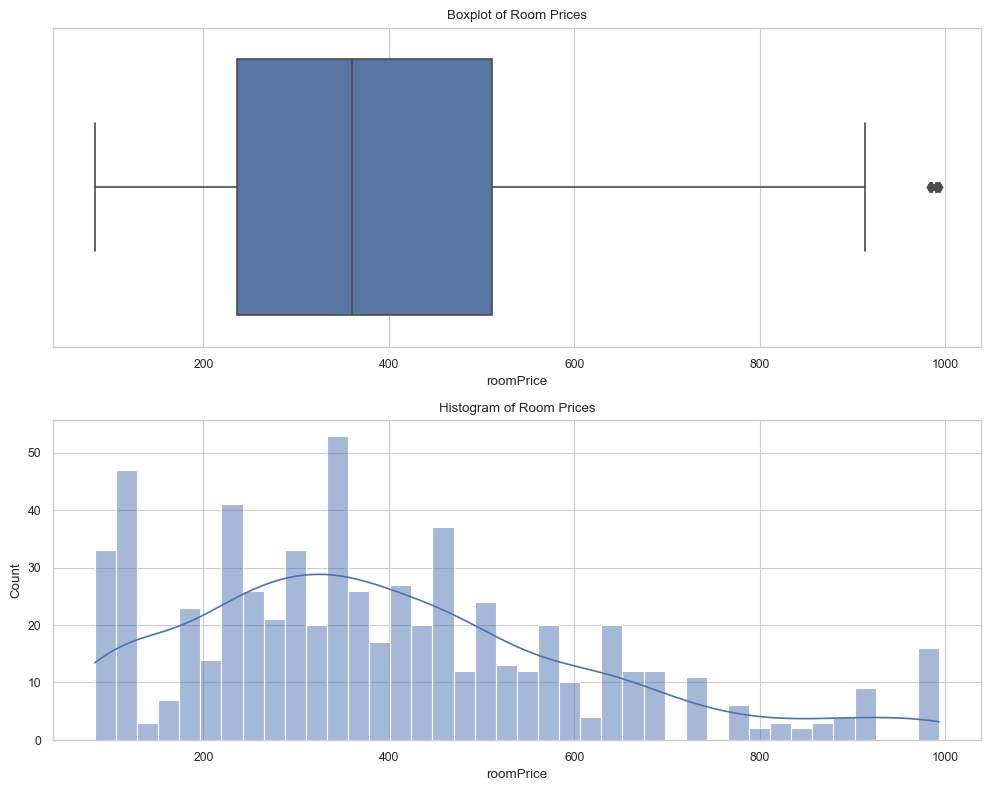

In [22]:
# Price Boxplot and Histogram

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Create the boxplot
sns.boxplot(data=num_df, x='roomPrice', ax=ax[0])
ax[0].set_title('Boxplot of Room Prices')

# Create the histogram
sns.histplot(data=num_df, x='roomPrice', bins=40, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Room Prices')

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
# Calculate the percentiles
low_price_threshold = df['roomPrice'].quantile(0.25)
high_price_threshold = df['roomPrice'].quantile(0.75)

# Create the 'priceCategory' column
df['priceCategory'] = pd.cut(
    df['roomPrice'],
    bins=[-float('inf'), low_price_threshold, high_price_threshold, float('inf')],
    labels=['Low price group', 'Medium price group', 'High price group']
)

# Display the first few rows to verify the new column
df[['roomPrice', 'priceCategory']].head()

,roomPrice,priceCategory
0,268.0,Medium price group
1,99.0,Low price group
2,329.0,Medium price group
3,595.0,High price group
4,276.0,Medium price group


In [24]:
df['priceCategory'].value_counts()

priceCategory
Medium price group    321
Low price group       161
High price group      161
Name: count, dtype: int64

In [25]:
# Calculate the percentage of new rooms
percentage_new_rooms = df['is_new'].mean() * 100

percentage_new_rooms

4.976671850699844

In [26]:
# Filter the dataset to include only rooms that are not new
not_new_rooms = df[df['is_new'] == 0]

# Describe the number of reviews and rating for rooms that are not new
reviews_and_rating_description = not_new_rooms[['countReviews', 'rating']].describe()

reviews_and_rating_description


,countReviews,rating
count,611.000000,611.000000
mean,82.456628,4.900115
std,82.408336,0.125321
min,3.000000,4.330000
25%,20.000000,4.860000
50%,49.000000,4.940000
75%,123.000000,5.000000
max,507.000000,5.000000


In [27]:
# Calculate the average rating for each price group
average_rating_per_price_group = not_new_rooms.groupby('priceCategory')['rating'].mean().rename('averageRating').reset_index()

average_rating_per_price_group

C:\Users\karlf\AppData\Local\Temp\ipykernel_20996\3220177763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_price_group = not_new_rooms.groupby('priceCategory')['rating'].mean().rename('averageRating').reset_index()


,priceCategory,averageRating
0,Low price group,4.784744
1,Medium price group,4.934497
2,High price group,4.949490


In [28]:
# Is the difference between average ratings statiscally significant?
# Perform the ANOVA test
anova_result = stats.f_oneway(
    df[df['priceCategory'] == 'Low price group']['rating'],
    df[df['priceCategory'] == 'Medium price group']['rating'],
    df[df['priceCategory'] == 'High price group']['rating']
)

# Print the results of the ANOVA test
print('ANOVA test result:', anova_result)

# If the p-value is less than 0.05, the differences are statistically significant.
# If the p-value is greater than 0.05, the differences are not statistically significant.

ANOVA test result: F_onewayResult(statistic=2.8605275268886468, pvalue=0.05797068235613843)


### Room types

In [29]:
# Room types
room_types = df['roomType'].value_counts(normalize=True)
room_types

roomType
Casa           0.177294
Apartamento    0.158631
Quarto         0.138414
Cabana         0.130638
Chalé          0.129082
Loft           0.069984
Microcasa      0.065319
Hotel          0.032659
Pousada        0.027994
Contêiner      0.018663
Suíte          0.017107
Lugar          0.015552
Condomínio     0.015552
Trailer        0.003110
Name: proportion, dtype: float64

### Quality Badge

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


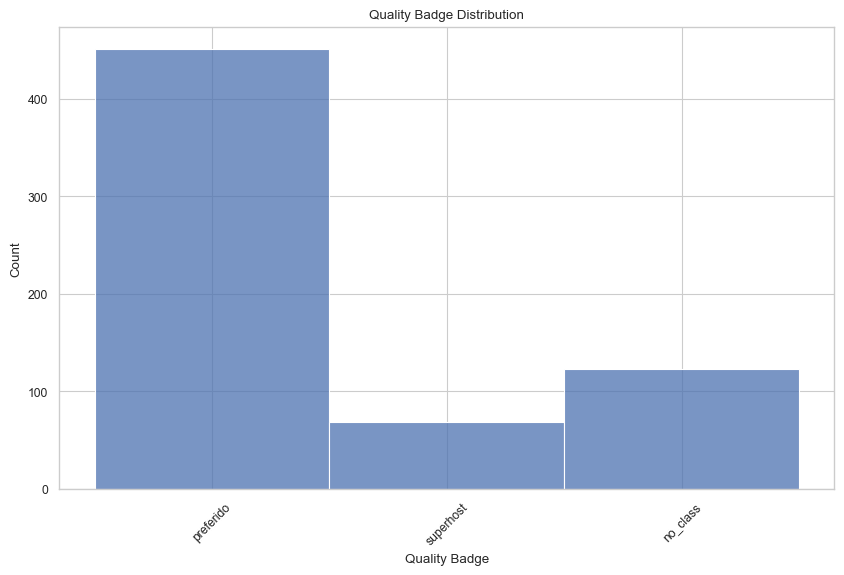

In [32]:
# Create a histogram of the quality badge distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='qualityBadge', stat='count', kde=False)
plt.title('Quality Badge Distribution')
plt.xlabel('Quality Badge')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


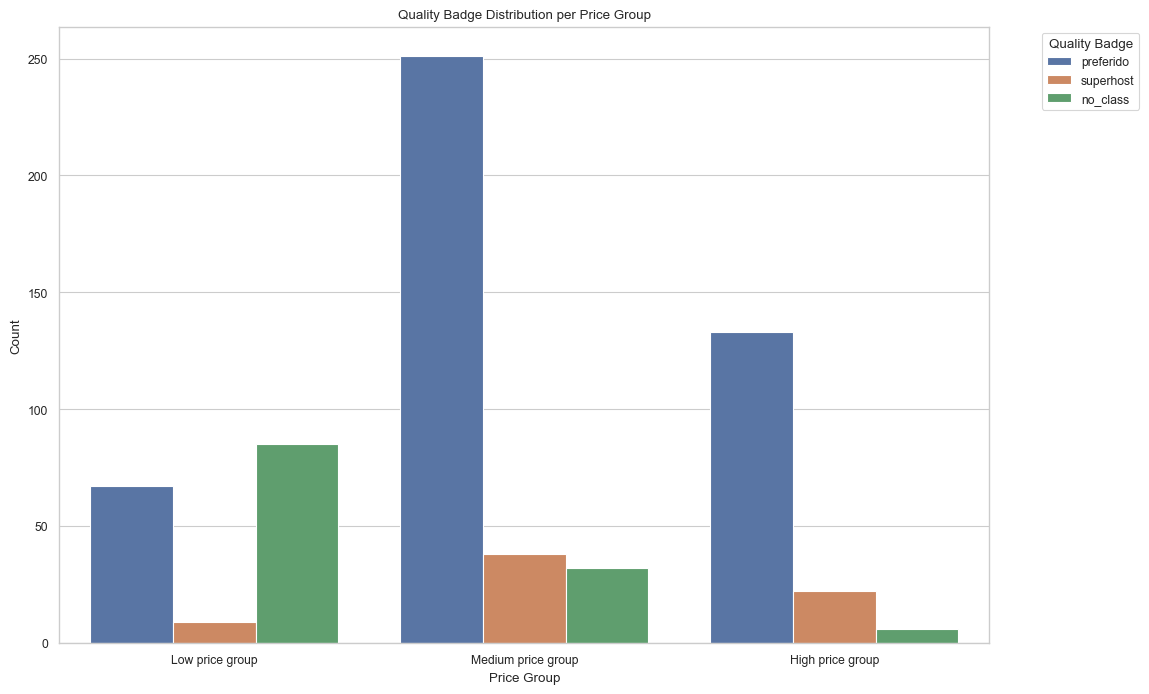

In [33]:
# Create a count plot for quality badge distribution per price group
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='priceCategory', hue='qualityBadge')
plt.title('Quality Badge Distribution per Price Group')
plt.xlabel('Price Group')
plt.ylabel('Count')
plt.legend(title='Quality Badge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
# Calculate the percentage of new rooms among the 'no_class' group
no_class_rooms = df[df['qualityBadge'] == 'no_class']
percentage_new_no_class = no_class_rooms['is_new'].mean() * 100

percentage_new_no_class


17.88617886178862

### Amenities

In [35]:
# Select all columns representing amenities
amenity_columns = df.columns[6:-2]  # Assuming amenities start from the 6th column onwards

# Calculate the frequency of each amenity
amenity_counts = df[amenity_columns].sum().sort_values(ascending=False)

# Calcular a porcentagem de cada amenidade
total_listings = len(df)
amenity_percentages = (amenity_counts / total_listings) * 100

# Ordenar as amenidades pela porcentagem
sorted_amenity_percentages = amenity_percentages.sort_values(ascending=False)

sorted_amenity_percentages


Parking                           64.074650
WiFi                              62.986003
Carbon Monoxide Alarm             54.276827
Smoke Alarm                       52.099533
Air Conditioning                  48.989114
Kitchen                           48.367030
TV                                39.035770
View                              32.814930
Pets Allowed                      29.237947
Security Cameras                  28.460342
HDTV                              18.195956
Bathtub                           17.729393
Patio                             15.241058
Hair Dryer                        14.930016
Luggage Dropoff Allowed            8.242613
Elevator                           8.087092
Refrigerator                       4.665630
Pool                               4.354588
Microwave                          4.043546
Sauna                              3.576983
Long term stays allowed            3.421462
Washer                             3.110420
Fire pit                        

## Bivariate Analysis

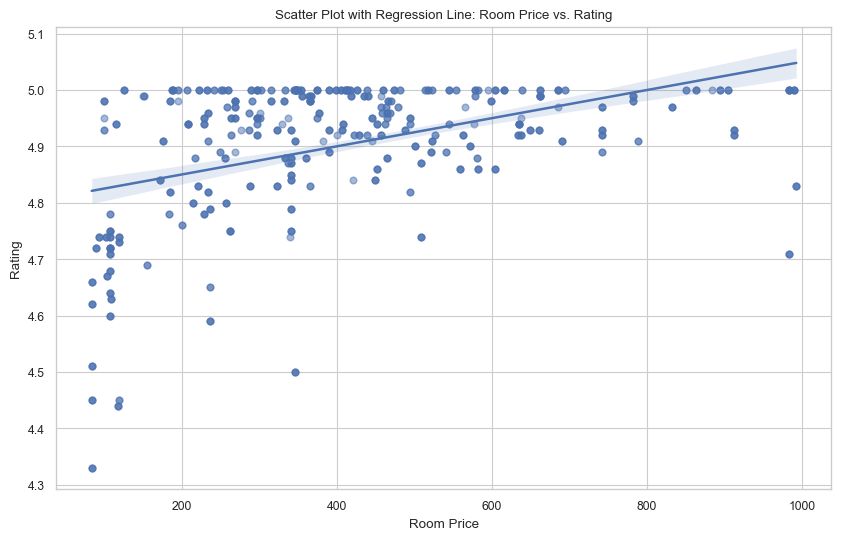

In [38]:
# Scatter plot with a regression line for Price vs. Rating
plt.figure(figsize=(10, 6))
sns.regplot(data=not_new_rooms, x='roomPrice', y='rating', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Room Price vs. Rating')
plt.xlabel('Room Price')
plt.ylabel('Rating')
plt.show()


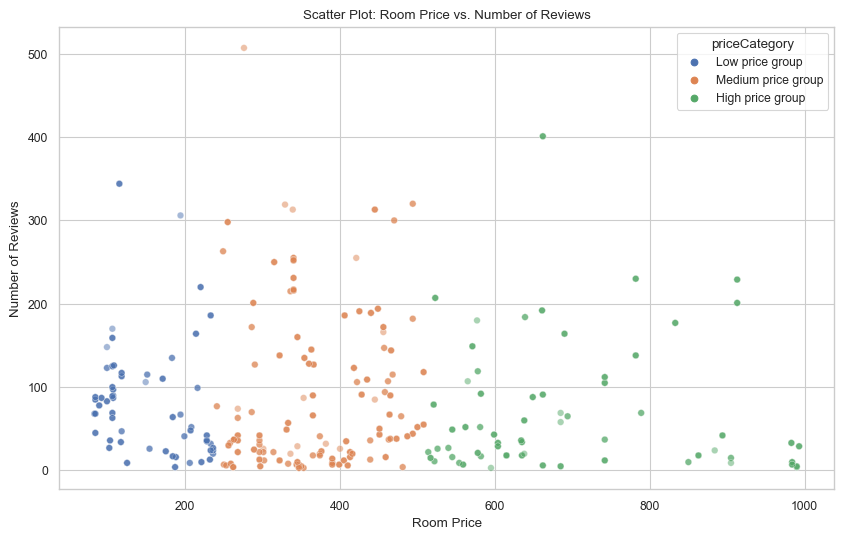

In [40]:
# Scatter plot for Price vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=not_new_rooms, x='roomPrice', y='countReviews', alpha=0.5, hue='priceCategory')
plt.title('Scatter Plot: Room Price vs. Number of Reviews')
plt.xlabel('Room Price')
plt.ylabel('Number of Reviews')
plt.show()


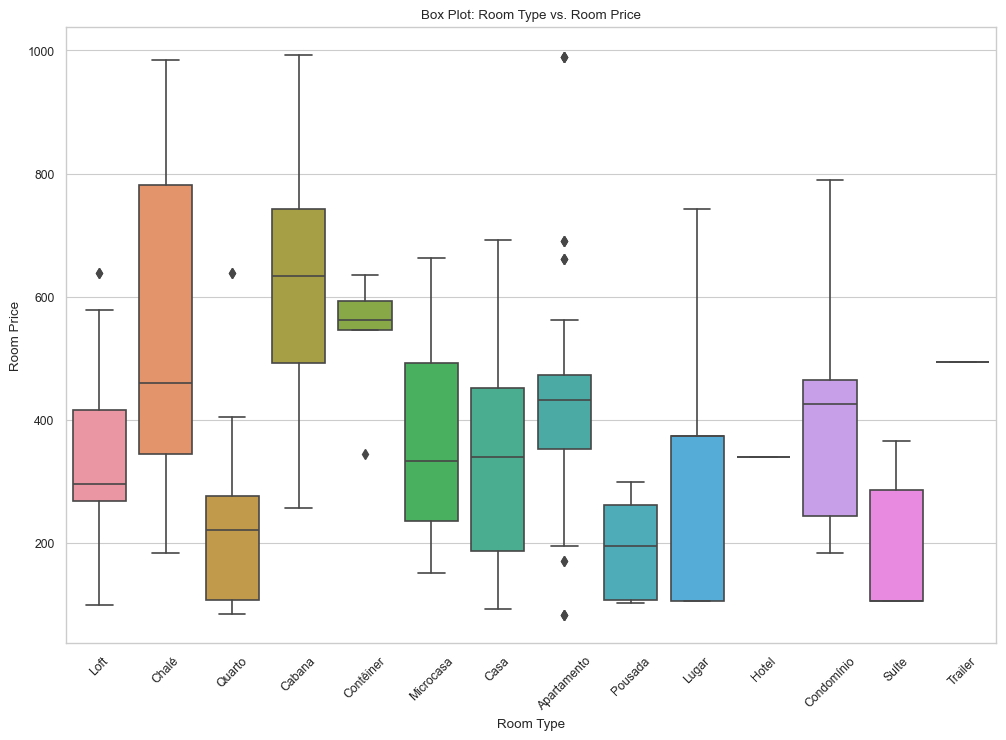

In [42]:
# Box plot for Room Type vs. Price
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='roomType', y='roomPrice')
plt.title('Box Plot: Room Type vs. Room Price')
plt.xlabel('Room Type')
plt.ylabel('Room Price')
plt.xticks(rotation=45)
plt.show()


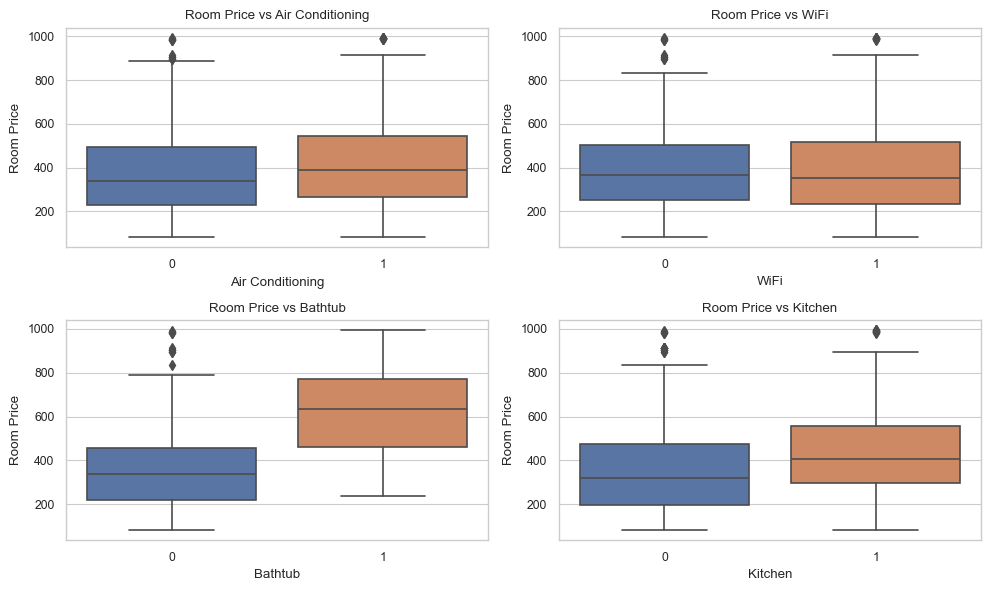

In [52]:
# List of Amenities vs Price

amenities = ['Air Conditioning', 'WiFi', 'Bathtub', 'Kitchen']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

# Generate box plots for each amenity
for i, amenity in enumerate(amenities):
    sns.boxplot(data=df, x=amenity, y='roomPrice', ax=axes[i])
    axes[i].set_title(f'Room Price vs {amenity}')
    axes[i].set_xlabel(amenity)
    axes[i].set_ylabel('Room Price')

plt.tight_layout()
plt.show()


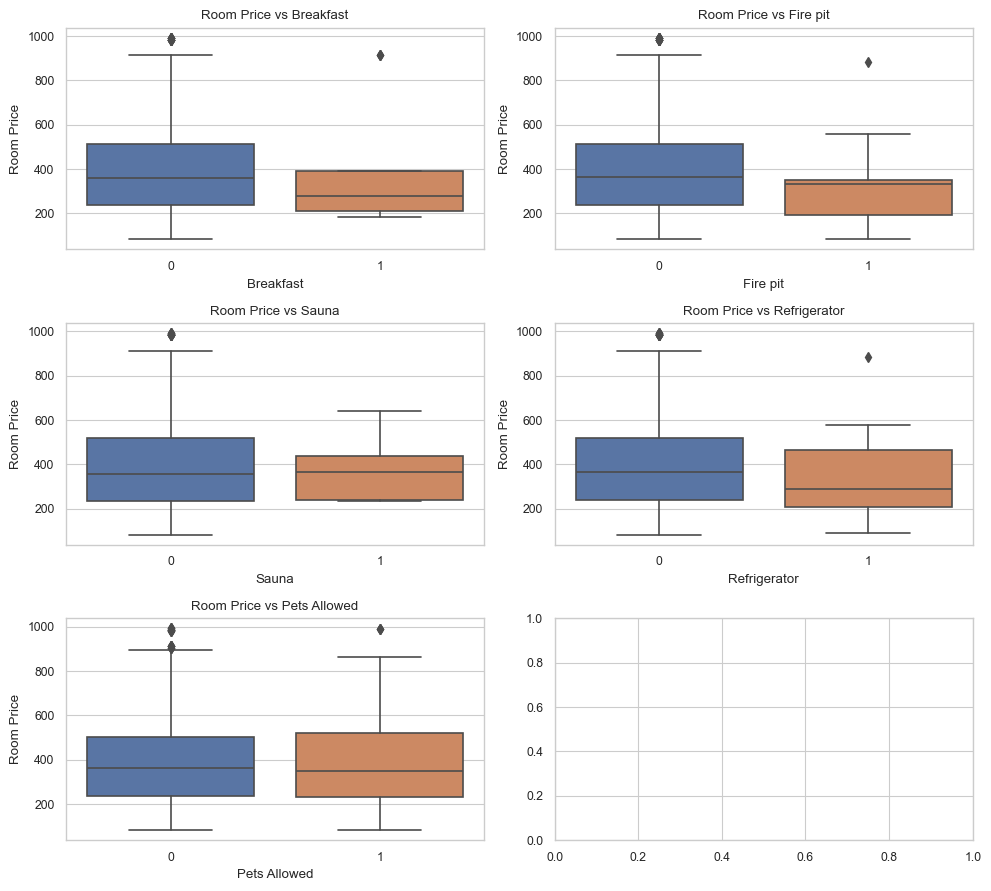

In [54]:
# List of Amenities vs Price

amenities = ['Breakfast', 'Fire pit', 'Sauna', 'Refrigerator', 'Pets Allowed']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
axes = axes.flatten()

# Generate box plots for each amenity
for i, amenity in enumerate(amenities):
    sns.boxplot(data=df, x=amenity, y='roomPrice', ax=axes[i])
    axes[i].set_title(f'Room Price vs {amenity}')
    axes[i].set_xlabel(amenity)
    axes[i].set_ylabel('Room Price')

plt.tight_layout()
plt.show()

# Direct Concorrence

In [56]:
# Filter the dataset for high price and preferred or superhost rooms
highPriceGroup = df.query('priceCategory == "High price group"')
competitors = highPriceGroup.query('qualityBadge == "preferido" | qualityBadge == "superhost"')

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


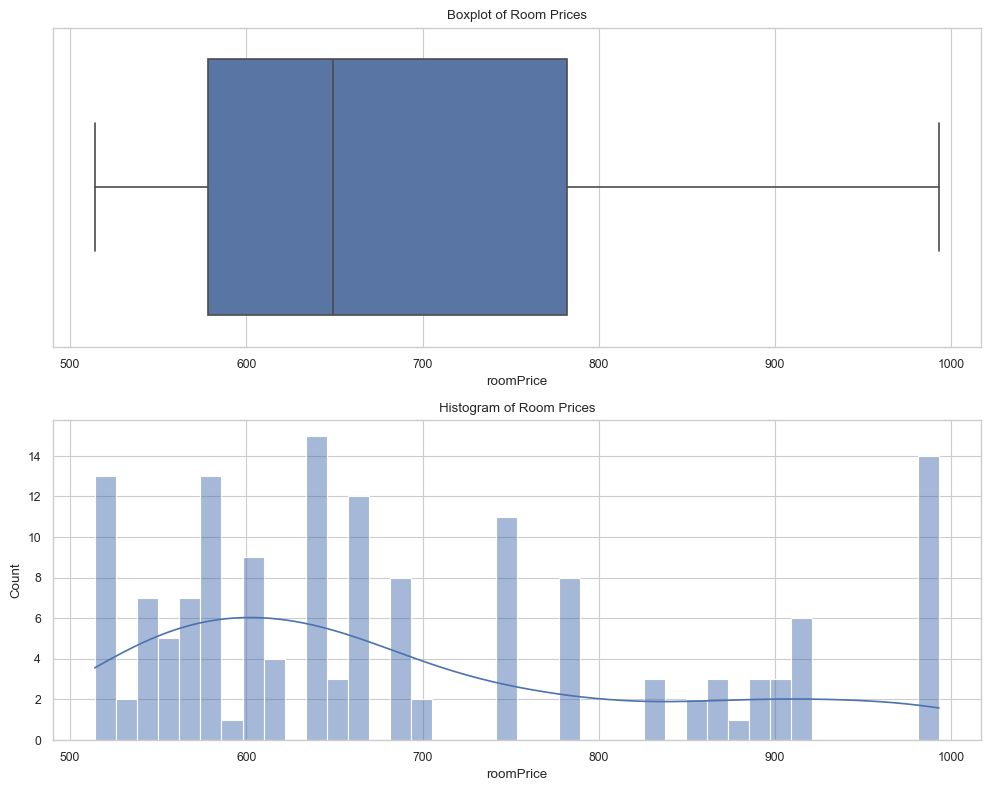

In [57]:
# Price Boxplot and Histogram

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Create the boxplot
sns.boxplot(data=competitors, x='roomPrice', ax=ax[0])
ax[0].set_title('Boxplot of Room Prices')

# Create the histogram
sns.histplot(data=competitors, x='roomPrice', bins=40, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Room Prices')

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
# Calculate the percentage of new rooms
competitors_percentage_new_rooms = competitors['is_new'].mean() * 100

competitors_percentage_new_rooms

0.0

In [61]:
## Descriptive Analysis
competitors_num_df = competitors[['roomPrice', 'rating', 'countReviews']].describe()

competitors_num_df

,roomPrice,rating,countReviews
count,155.000000,155.000000,155.000000
mean,693.419355,4.948839,74.529032
std,144.726202,0.058731,80.687654
min,514.000000,4.710000,3.000000
25%,578.000000,4.920000,18.000000
50%,649.000000,4.970000,37.000000
75%,782.000000,5.000000,106.000000
max,993.000000,5.000000,401.000000


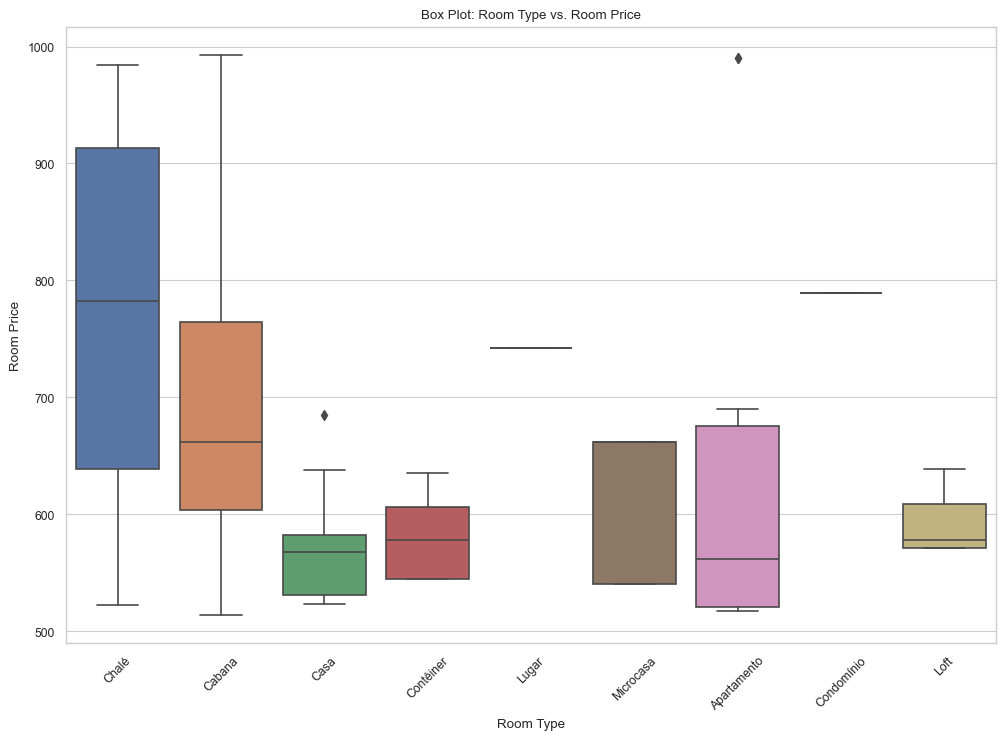

In [62]:
# Box plot for Room Type vs. Price
plt.figure(figsize=(12, 8))
sns.boxplot(data=competitors, x='roomType', y='roomPrice')
plt.title('Box Plot: Room Type vs. Room Price')
plt.xlabel('Room Type')
plt.ylabel('Room Price')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Select all columns representing amenities
competitors_amenity_columns = competitors.columns[6:-2]  # Assuming amenities start from the 6th column onwards

# Calculate the frequency of each amenity
competitors_amenity_counts = competitors[competitors_amenity_columns].sum().sort_values(ascending=False)

# Calcular a porcentagem de cada amenidade
total_listings = len(df)
amenity_percentages = (competitors_amenity_counts / total_listings) * 100

# Ordenar as amenidades pela porcentagem
sorted_amenity_percentages = amenity_percentages.sort_values(ascending=False)

sorted_amenity_percentages.head(10)

Parking                  15.707621
WiFi                     15.552100
Kitchen                  13.996890
Air Conditioning         12.908243
Carbon Monoxide Alarm    12.441680
Smoke Alarm              11.041991
View                     10.730949
Bathtub                  10.419907
TV                        8.553655
Pets Allowed              7.465008
dtype: float64

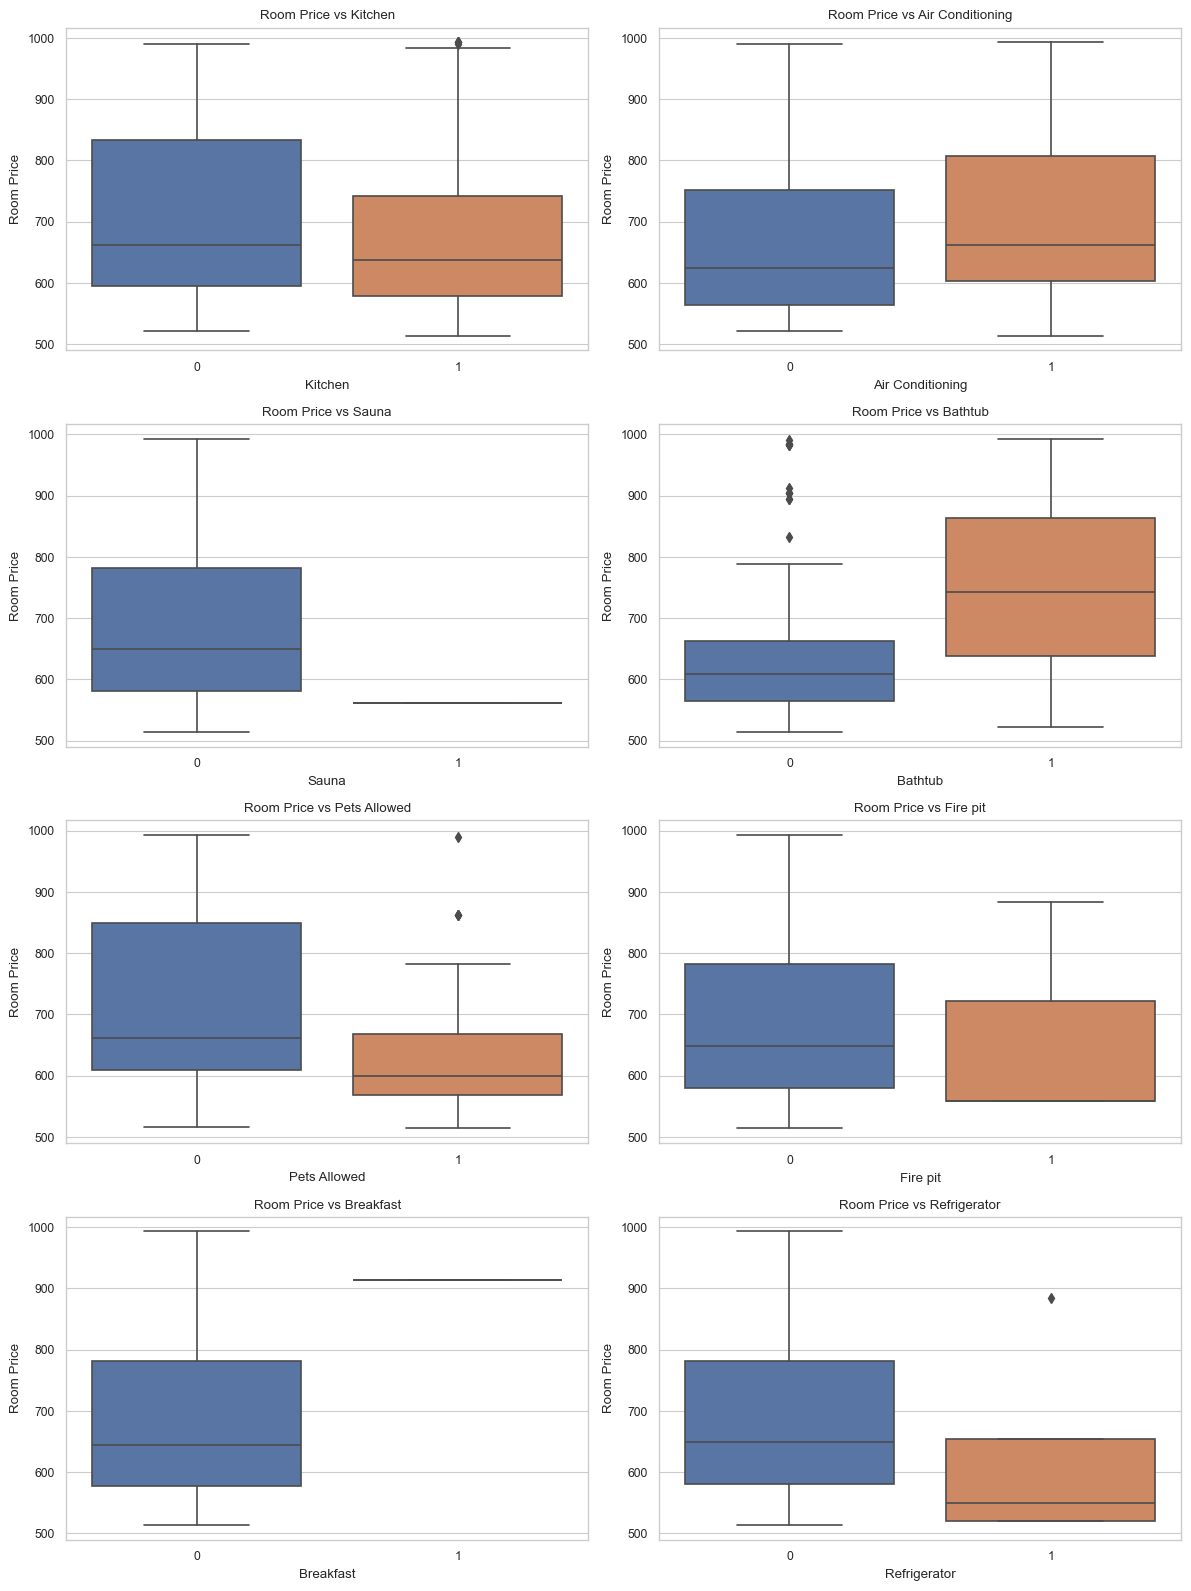

In [68]:
# List of Amenities vs Price

amenities = ['Kitchen', 'Air Conditioning', 'Sauna', 'Bathtub', 'Pets Allowed', 'Fire pit', 'Breakfast', 'Refrigerator']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

# Generate box plots for each amenity
for i, amenity in enumerate(amenities):
    sns.boxplot(data=competitors, x=amenity, y='roomPrice', ax=axes[i])
    axes[i].set_title(f'Room Price vs {amenity}')
    axes[i].set_xlabel(amenity)
    axes[i].set_ylabel('Room Price')

plt.tight_layout()
plt.show()